# Import libraries, load data and pre-trained model

In [1]:
# Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.datasets import mnist
import RBM_lib as RBM_lib
%matplotlib inline

# Read mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scale the data between 0 and 1
x_train, x_test = np.divide(x_train, 255.0), np.divide(x_test, 255.0)

# Flatten data: reshape 28*28 matrices in flat arrays of 784 elements
x_train= x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test= x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
# Binarize
x_train = (x_train >= 0.5)
x_test = (x_test >= 0.5)

# Load trained model
model = RBM_lib.load_model("models/binv_nh100.pkl")

# Set seed
np.random.seed(0)

Using TensorFlow backend.


# Print weights table

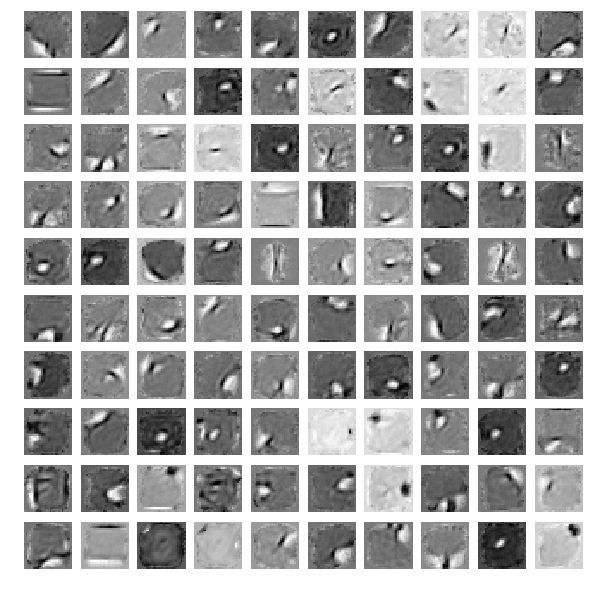

In [2]:
model.w_map(10,10)

# Daydreaming panel

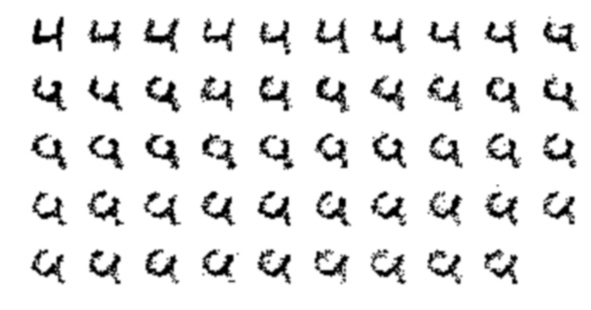

In [3]:
# Number of rows in panel
r = 5 
# Number of columns in panel
c = 10
# Number of gibbs samplings between one image and the other
sam = 5
# Option for parallel sampling
parall = False

fig = plt.figure(figsize=(c,r))

for i in range(1,r*c):
    ax = fig.add_subplot(r,c,i)
    if i == 1:
        vout = x_train[np.random.randint(low=0,high=x_train.shape[0]),:]
    else:
        if not parall:
            vout = model.dream(vout, gibbs_sampling_steps=sam)
        else:
            vin = vout
            vout = np.zeros((784))
            for s in range(49):
                vout += model.dream(vin, gibbs_sampling_steps=sam)
            vout = np.multiply(1,np.divide(vout,50.0) >= 0.5)
            
    ax.imshow(vout.reshape(28,28), cmap="Greys", interpolation="bicubic")
    ax.axis("off")

plt.show()

# Reconstruction panels

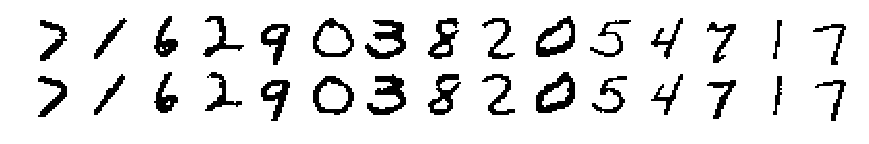

In [4]:
# Option for parallel sampling
parall = True
# Number of samples
nsamples = 15
# Select random samples
indices = np.random.randint(low=0, high=x_train.shape[0], size=(nsamples))

fig = plt.figure(figsize=(nsamples,3))
fig.subplots_adjust(hspace=-0.01,wspace=-0.01)


for i,iv in enumerate(indices):
    ax = fig.add_subplot(3,nsamples,i+1)
    ax.imshow(x_train[iv,:].reshape(28,28),cmap='Greys', interpolation='nearest')
    ax.axis('off')
    
    ax = fig.add_subplot(3,nsamples,nsamples + i+1)
    if not parall:
        vfin = model.dream(x_train[iv,:], gibbs_sampling_steps=1)
    else:
        vfin = model.dream(x_train[iv,:], gibbs_sampling_steps=1)
        for s in range(99):
            vt = model.dream(x_train[iv,:], gibbs_sampling_steps=1)
            vfin += vt
        vfin = np.multiply(1,np.divide(vfin,100.0) > 0.5)
    
    ax.imshow(vfin.reshape(28,28),cmap='Greys', interpolation='nearest')
    ax.axis('off')
    
plt.show()

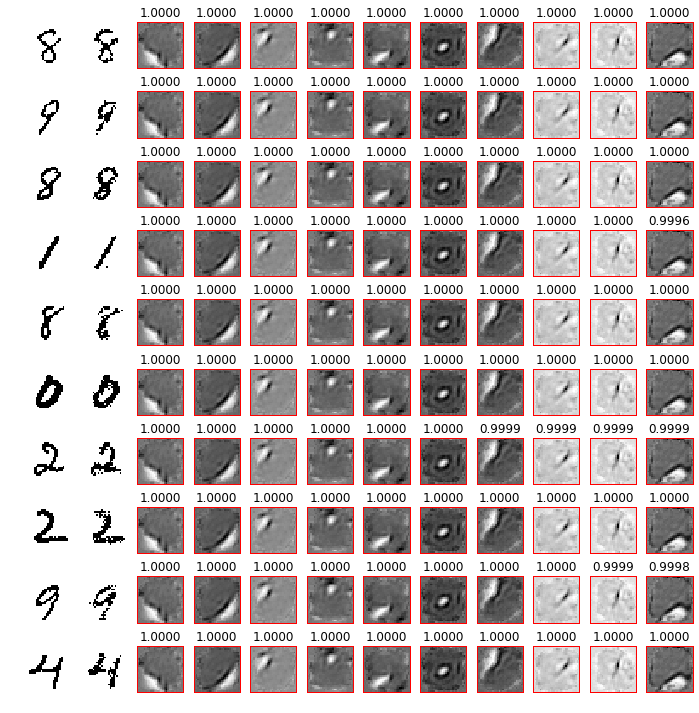

In [5]:
# Number of samples
nsamples = 10
# Select random samples
indices = np.random.randint(low=0, high=x_train.shape[0], size=(nsamples))

fig = plt.figure(figsize=(12,1.2*nsamples))
fig.subplots_adjust(hspace=0.5)

for i,iv in enumerate(indices):
    # Samples column
    ax = fig.add_subplot(nsamples,12,i*12 + 1)
    ax.imshow(x_train[iv,:].reshape(28,28),cmap='Greys', interpolation='nearest')
    ax.axis('off')
    
    # Reconstruction column
    ax = fig.add_subplot(nsamples,12,i*12 + 2)
    vfin = model.dream(x_train[iv,:], gibbs_sampling_steps=1)
    ax.imshow(vfin.reshape(28,28),cmap='Greys', interpolation='nearest')
    ax.axis('off')
    
    # Positive phase, find the hidden probability of activation
    phdvd = model.positive_activate(x_train[i,:])
    # Find the 10 most activated ones
    best = phdvd[np.argsort(phdvd)][::-1][0:10]
    
    for j in range(10):
        if best[j] > 0.0000999:
            matplotlib.rc('axes',edgecolor='r')
        else:
            matplotlib.rc('axes',edgecolor='black')
        
        # Weights table with activation probability
        ax = fig.add_subplot(nsamples,12,i*12 + j + 3) 
        ax.imshow(model.W[:,j].reshape(28,28), 
                          cmap='Greys', interpolation='nearest')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title("%0.4f" % best[j])
        
plt.show()

# Training weight monitoring

 60000/60000
Epoch: 0, lrate: 0.001000, Error: 136.3279
 60000/60000
Epoch: 0, lrate: 0.001000, Error: 113.2400
 60000/60000
Epoch: 0, lrate: 0.001000, Error: 108.4117
 60000/60000
Epoch: 0, lrate: 0.001000, Error: 105.8859
 60000/60000
Epoch: 0, lrate: 0.001000, Error: 104.4659
 60000/60000
Epoch: 0, lrate: 0.001000, Error: 103.1109
 60000/60000
Epoch: 0, lrate: 0.001000, Error: 102.1722
 60000/60000
Epoch: 0, lrate: 0.001000, Error: 101.1692
 60000/60000
Epoch: 0, lrate: 0.001000, Error: 100.6440
 60000/60000
Epoch: 0, lrate: 0.001000, Error: 100.3174


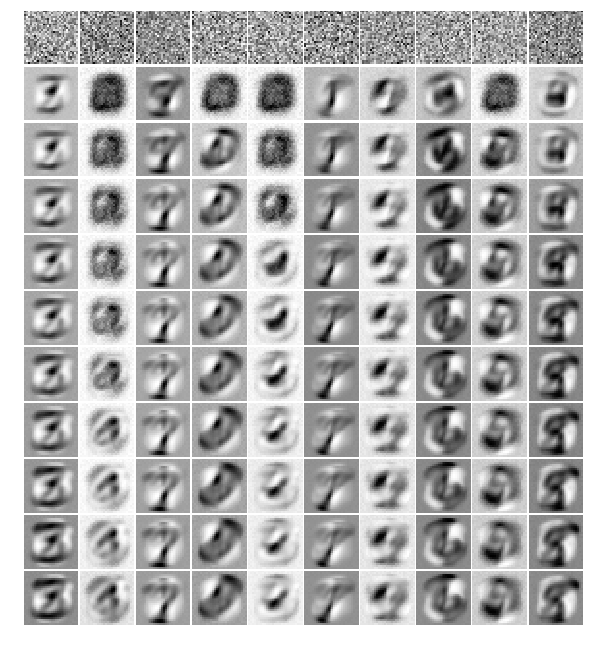

In [6]:
# Generate and train new model of 10 hidden units
visible_units = x_train.shape[1]
hidden_units = 10
model = RBM_lib.RBM(nvisible = visible_units, nhidden = hidden_units)

# Set learning rate and number of epochs
lrate = 0.001
emax = 10

# Plot initial weights
fig = plt.figure(figsize=(hidden_units,emax+1))
fig.subplots_adjust(hspace=0.05,wspace=0.05)
for j in range(hidden_units):
    ax = fig.add_subplot(emax+1,hidden_units,j + 1)
    ax.imshow(model.W[:,j].reshape(28,28), cmap="Greys", interpolation="nearest")
    ax.axis('off')

# For each epoch print the weights
for e in range(1,emax+1):
    # Gibbs sampling schedule: for first 5 epochs use 1, for later 5 use 2
    if e < 5:
        sam = 1
    else:
        sam = 2
    # Train binary model at constant learning rate
    model.train(x_train[:, :], gibbs_sampling_steps=sam,
                lrate=lrate, epochs=1, decay_rate=1.0,
                verbose=True, binary_v=True, binary_h=True)
    # Plot weights
    for j in range(hidden_units):
        ax = fig.add_subplot(emax+1,hidden_units,10*(e) + j + 1)
        ax.imshow(model.W[:,j].reshape(28,28), cmap="Greys", interpolation="nearest")
        ax.axis('off')

plt.show()
    
